# Power Transformer

# Box Cox, Yeo Jhonson

In [11]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [12]:
# load the dataset
df = pd.read_csv('../Dataset/concrete_data.csv')

In [13]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
# shape of dataset
df.shape

(1030, 9)

In [15]:
# Check for missing values in the DataFrame
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [16]:
# display statistical summary of the dataset
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [17]:
# split the dataset into features and target variable
X = df.drop(columns= ['Strength'])
y = df.iloc[:, -1]

In [18]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


R² tells you how well your model’s predictions match the actual data.

In [20]:
# Initialize Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model using R-squared score
print(r2_score(y_test, y_pred))



0.6275531792314848


In [21]:
# Cross-check the Linear Regression performance using cross-validation
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

# Compute R-squared score using cross-validation and take the mean
np.mean(cross_val_score(lr, X, y, scoring='r2'))

np.float64(0.4609940491662864)

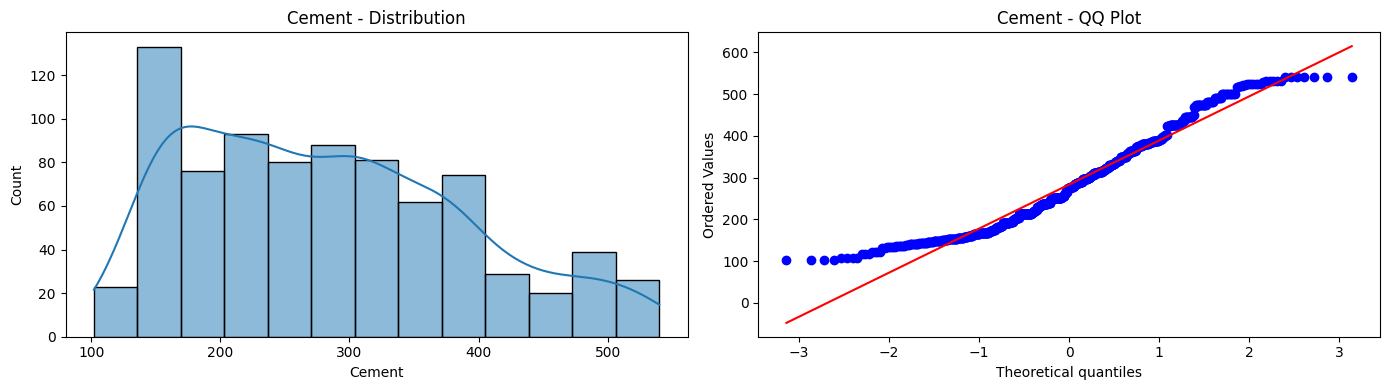

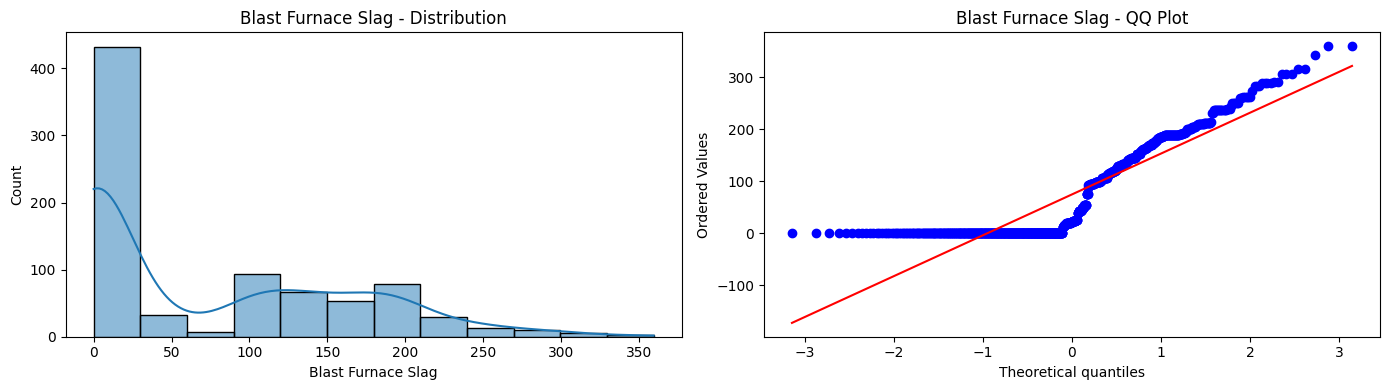

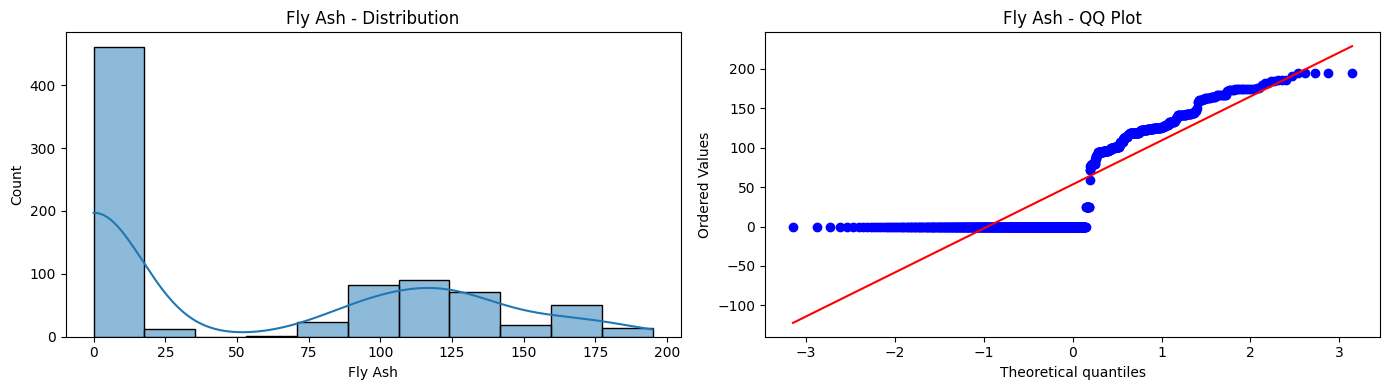

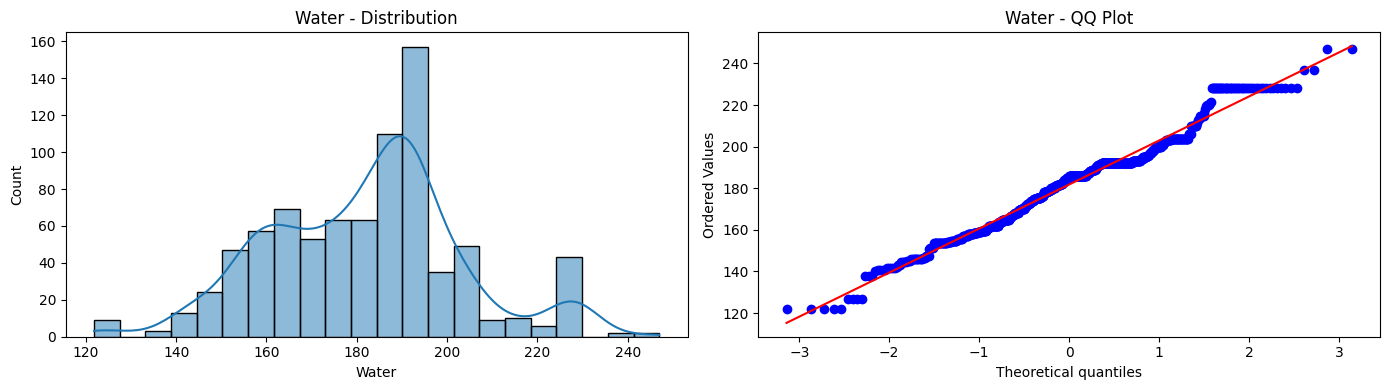

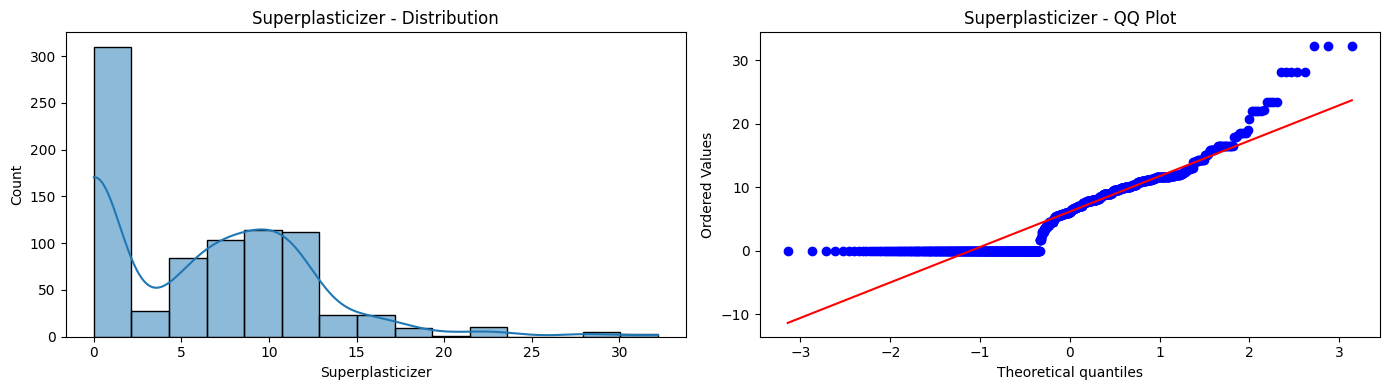

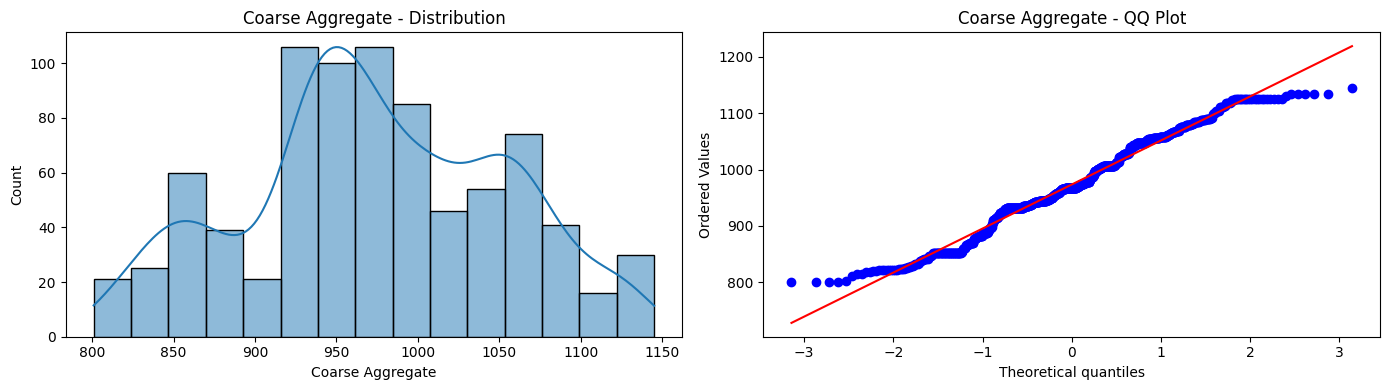

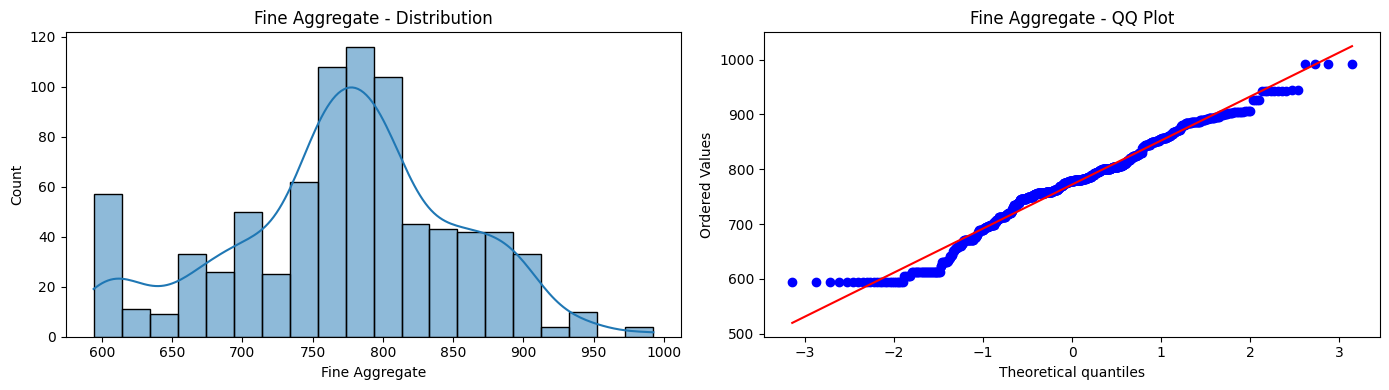

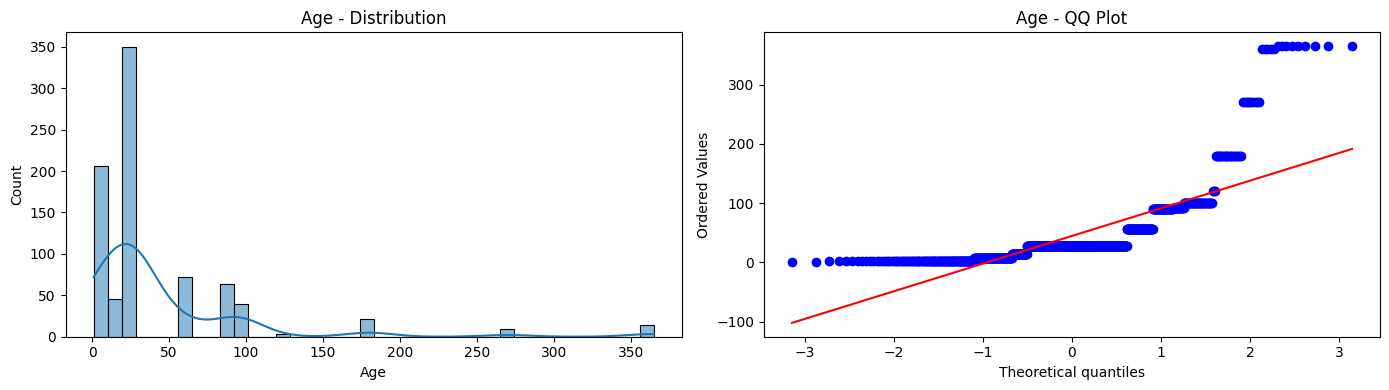

In [22]:
for col in X_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    
    # Histogram + KDE
    sns.histplot(X_train[col], kde=True, ax=axes[0])
    axes[0].set_title(f"{col} - Distribution")
    
    # QQ plot
    stats.probplot(X_train[col], dist="norm", plot=axes[1])
    axes[1].set_title(f"{col} - QQ Plot")
    
    plt.tight_layout()
    plt.show()


In [23]:
# apply box-cox transform
pt= PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+ 0.000001)
X_test_transformed = pt.transform(X_test+ 0.000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [24]:
# apply linear regression on transformed data
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred2 =lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)

0.8047825011028632

In [25]:
# use cross val score

pt =PowerTransformer(method='box-cox')
X_transformed= pt.fit_transform(X+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed, y, scoring='r2'))

np.float64(0.6662950327179041)

In [26]:
import pandas as pd

X_train_transformed_df = pd.DataFrame(
    X_train_transformed, 
    columns=X_train.columns,   # reuse original column names
    index=X_train.index        # keep same row index
)


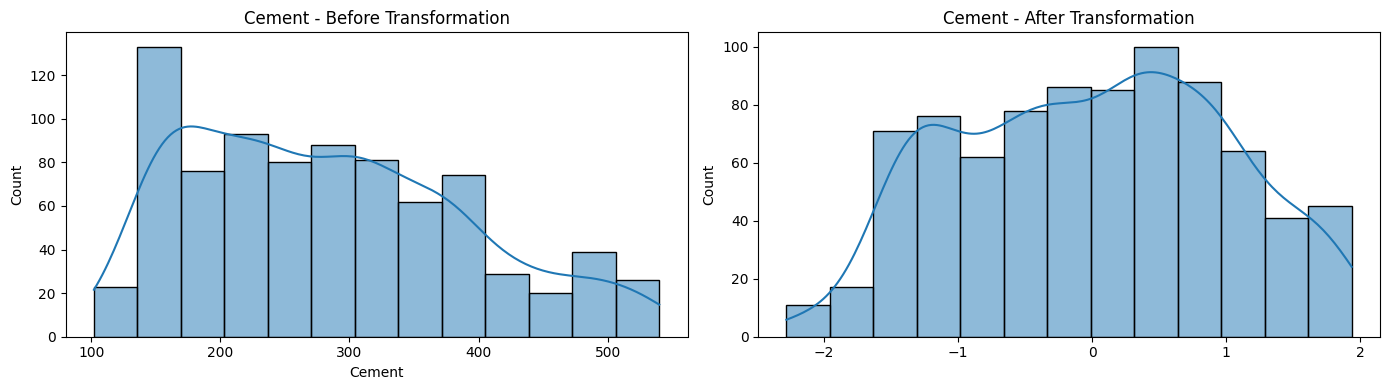

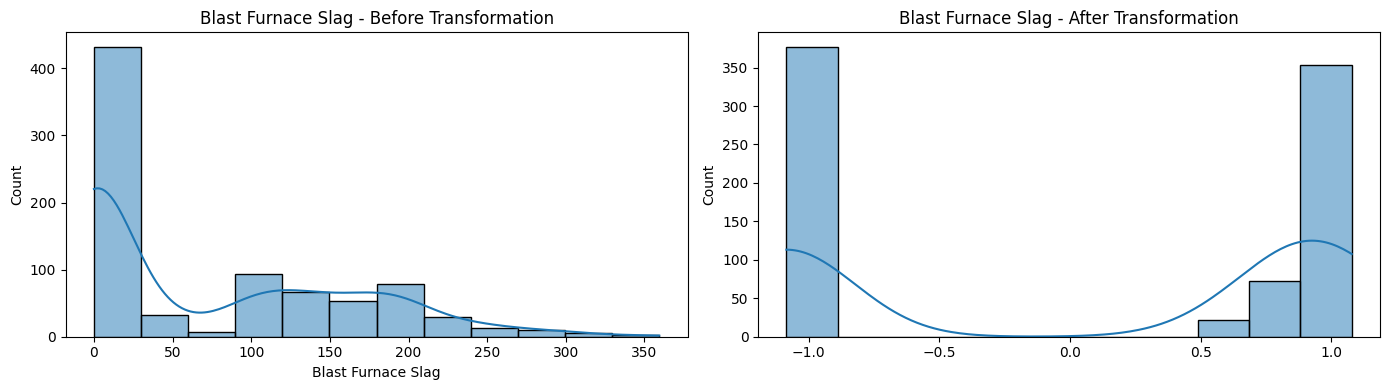

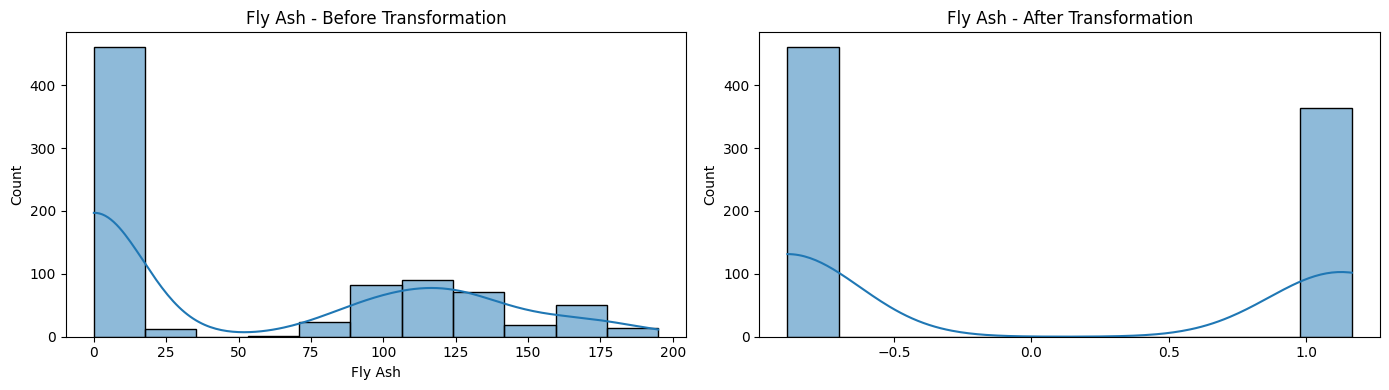

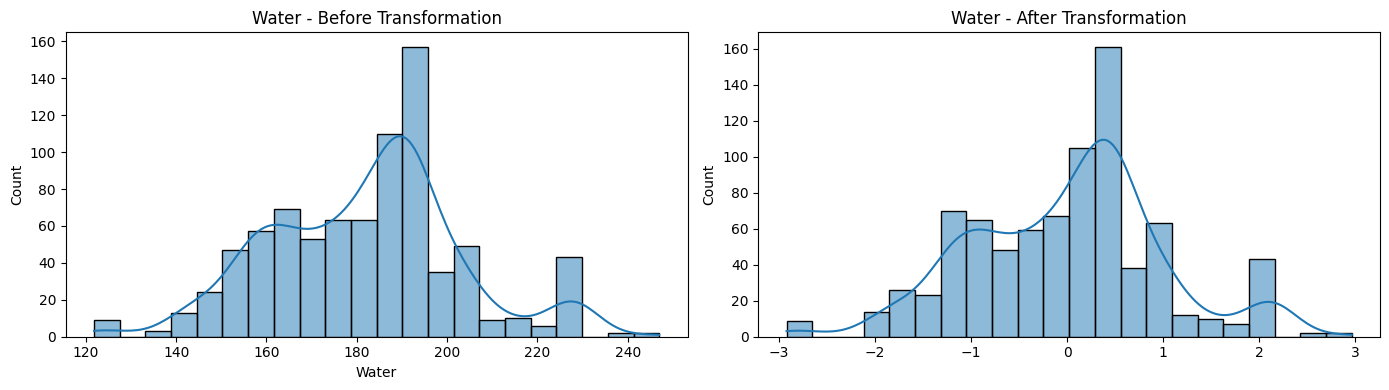

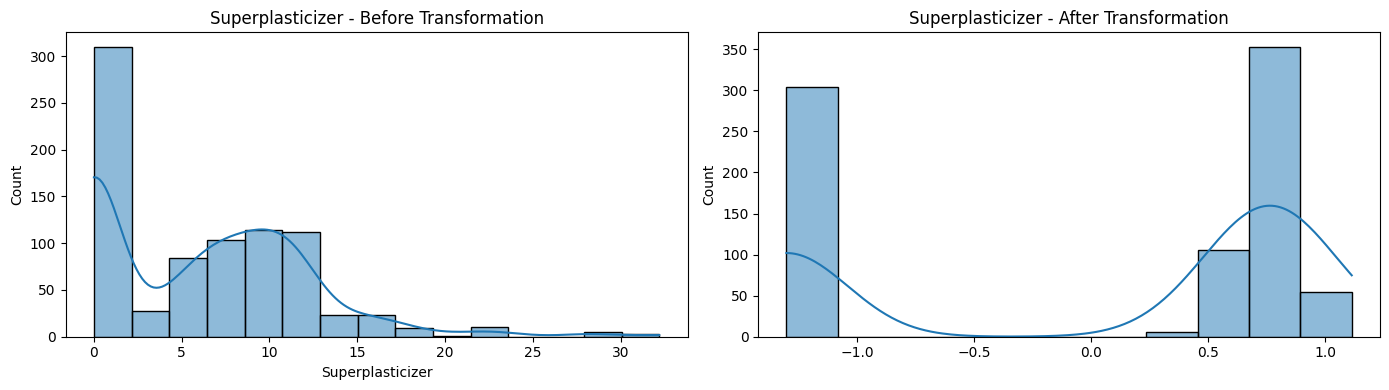

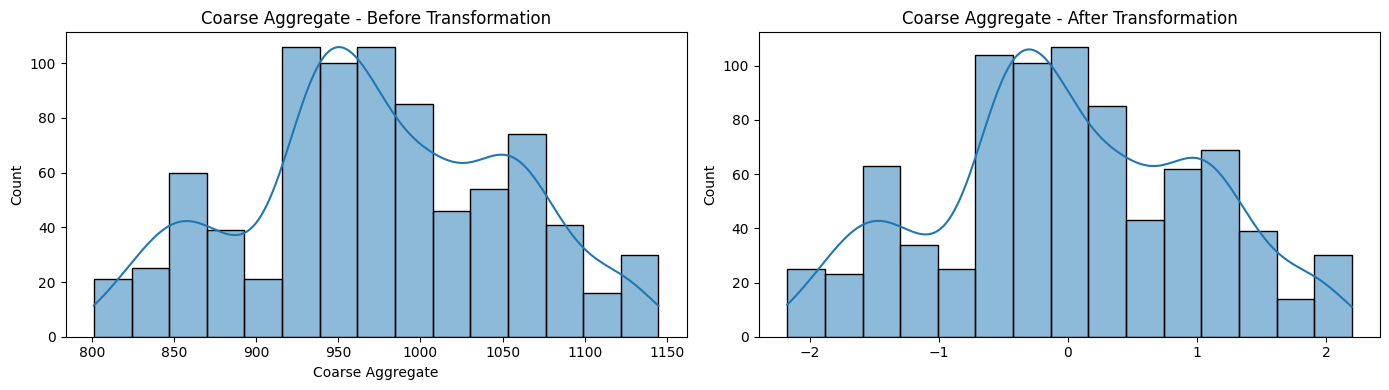

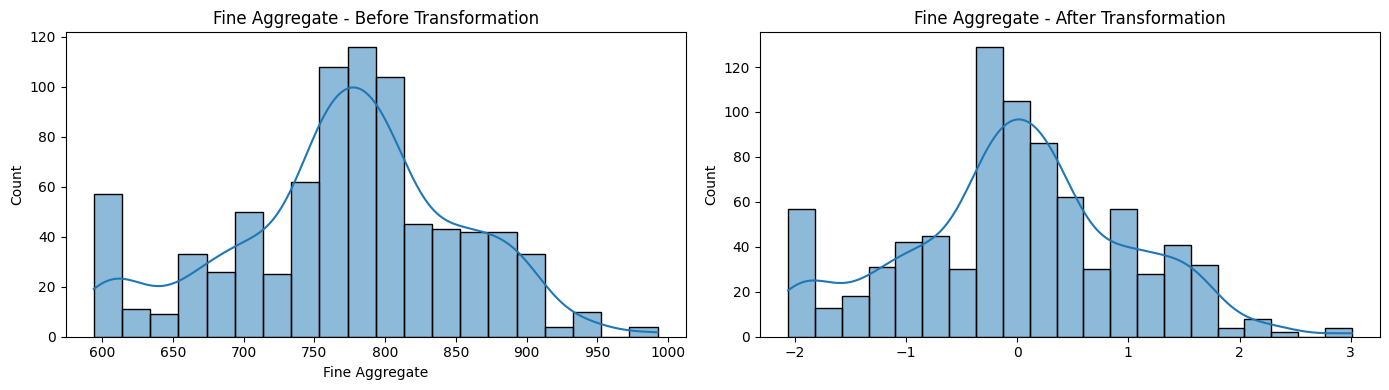

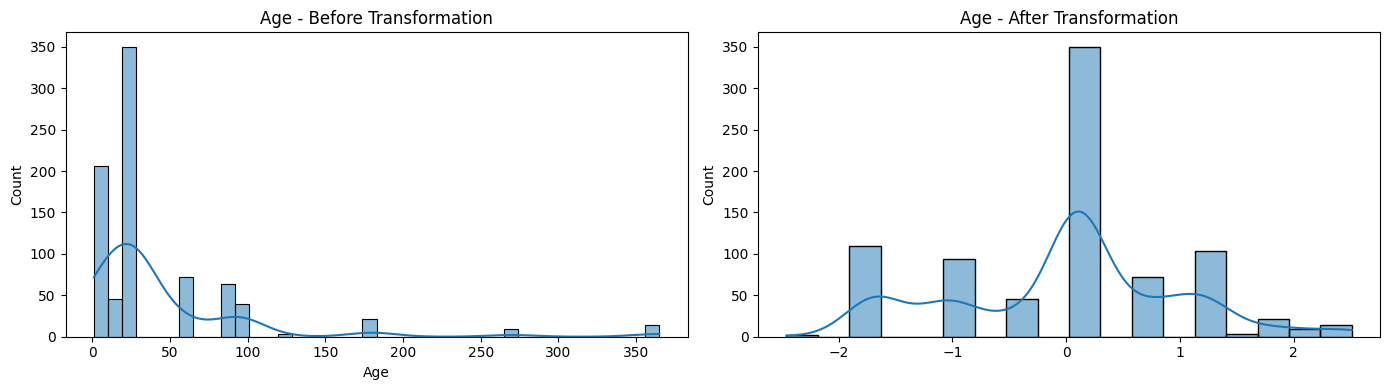

In [27]:
# Compare the distribution of each feature before and after transformation
for i, col in enumerate(X_train.columns):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Plot histogram before transformation
    sns.histplot(X_train[col], kde=True, ax=axes[0])
    axes[0].set_title(f"{col} - Before Transformation")
    
    # Plot histogram after transformation
    sns.histplot(X_train_transformed[:, i], kde=True, ax=axes[1])
    axes[1].set_title(f"{col} - After Transformation")
    
    plt.tight_layout()
    plt.show()




In [28]:
# apply yeo-jhonson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test, y_pred3))
pd.DataFrame({'cols': X_train.columns, 'Yeo_Jhonson_lambdas': pt1.lambdas_})

0.8001287391471197


,cols,Yeo_Jhonson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [29]:
# apply cross val score
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, y, scoring='r2'))

np.float64(0.6834625141500864)

In [30]:
X_train_transformed2= pd.DataFrame(X_transformed2, columns= X_train.columns)

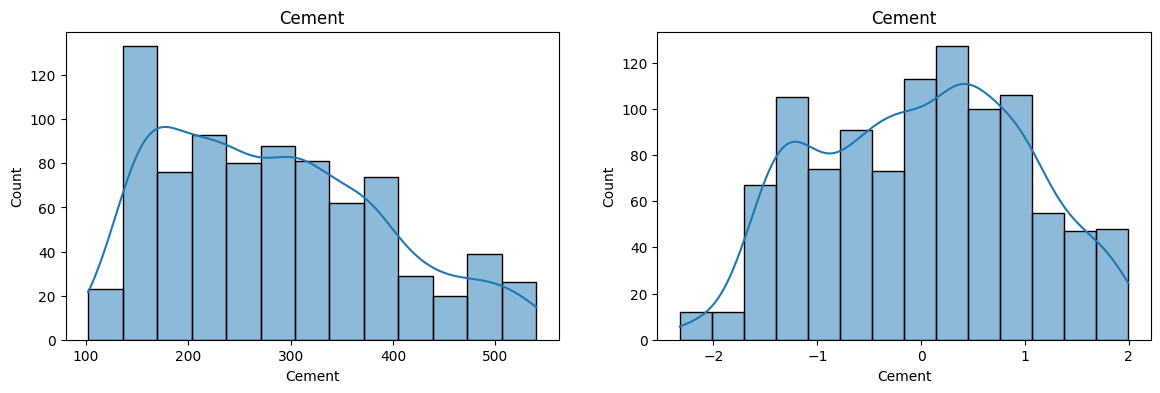

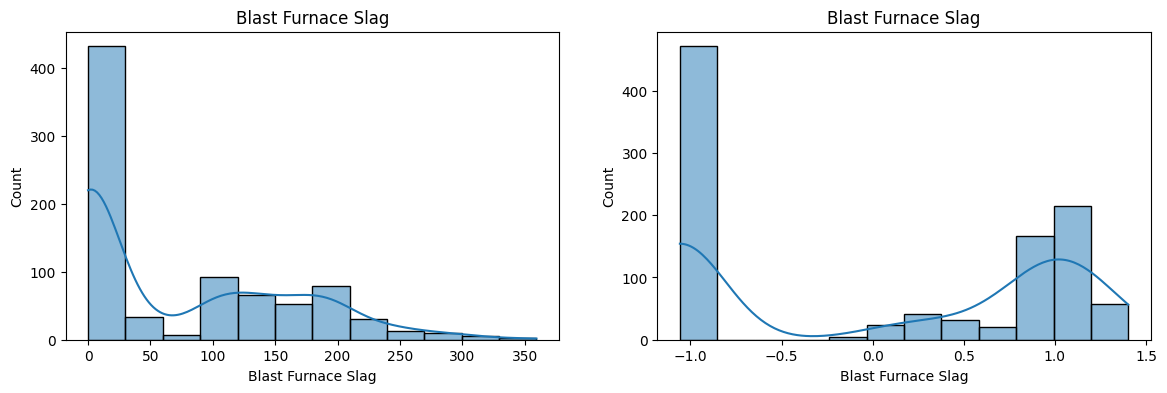

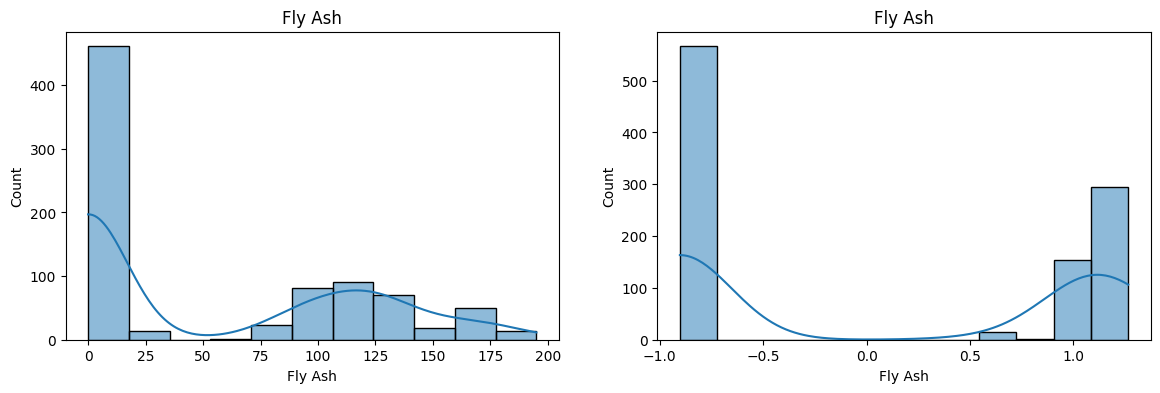

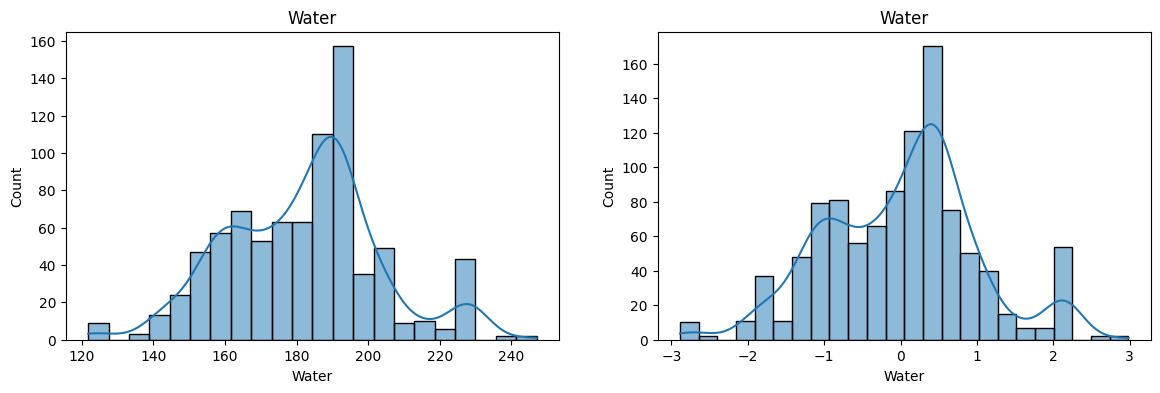

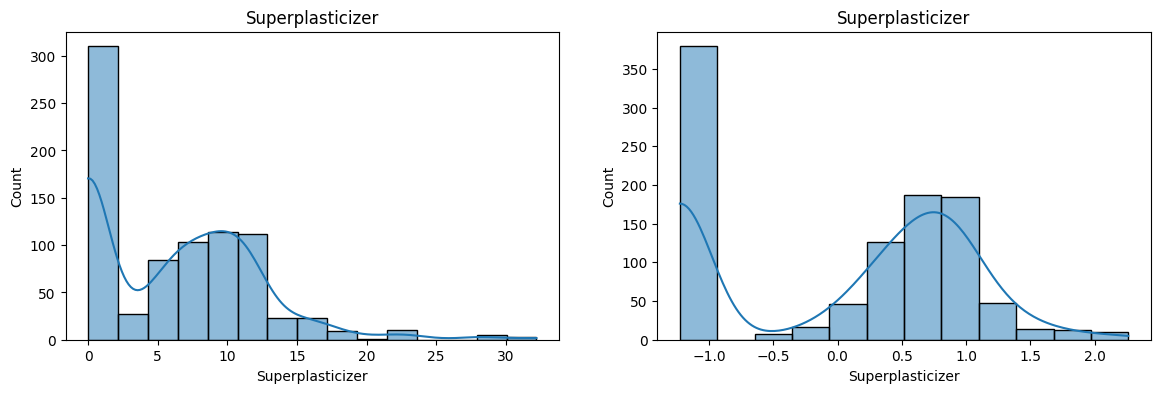

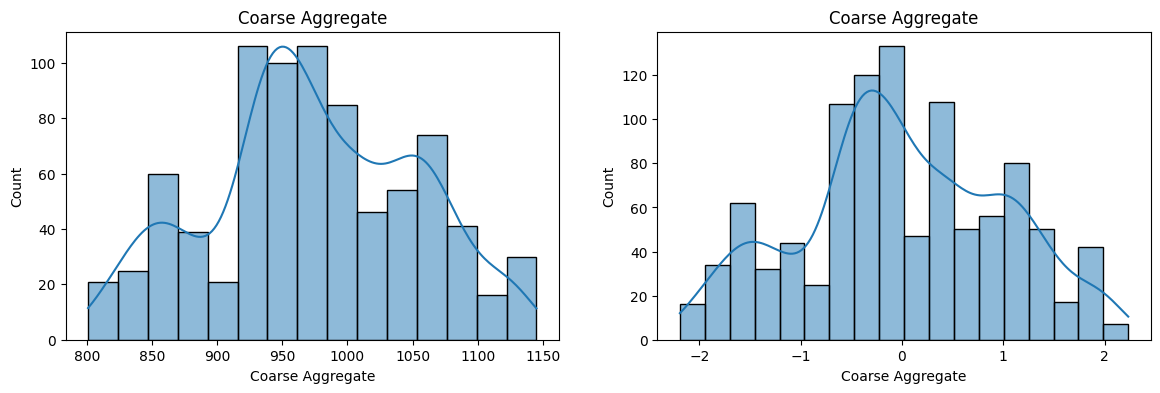

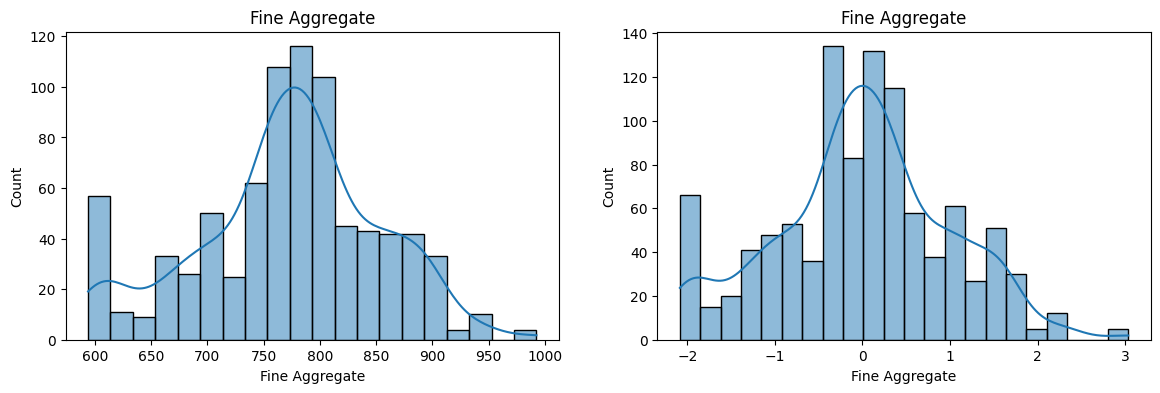

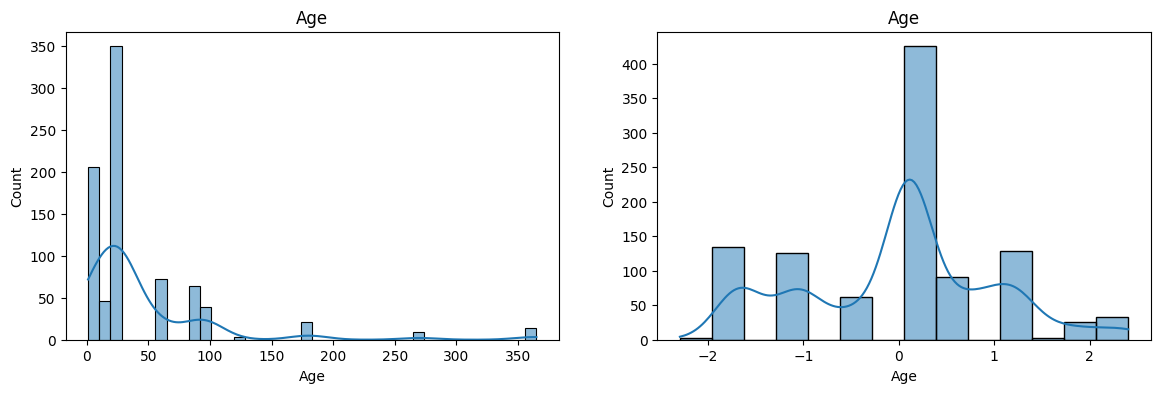

In [31]:
# before and after comparison of yeo-jhsonson 

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(col)
    plt.show()

In [32]:
# side by side lambdas
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas': pt.lambdas_, 'yeo_johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.169544,0.213025
1,Blast Furnace Slag,0.016633,0.020476
2,Fly Ash,-0.136480,-0.038218
3,Water,0.808438,0.958936
4,Superplasticizer,0.264160,0.304951
5,Coarse Aggregate,1.129395,1.192751
6,Fine Aggregate,1.830763,1.975085
7,Age,0.001771,-0.062443
